In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras import models,layers
from tensorflow.keras.datasets import cifar10

In [72]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [76]:
len(train_images),len(test_images)

(60000, 10000)

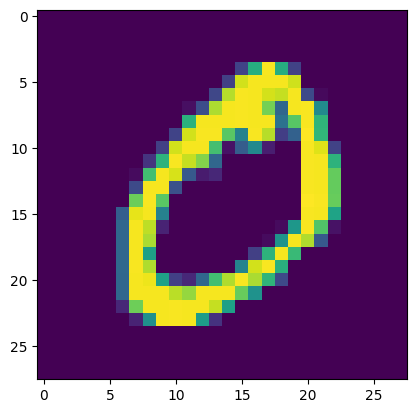

In [75]:
#  using pyplot print image
plt.imshow(train_images[1])

In [22]:
print(train_labels[1])

[9]


In [77]:
#Noramlizing the data
train_images = train_images/255.0
test_images = test_images/255.0

In [102]:
# Creating models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

In [103]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,064 (109.62 KB)

 Trainable params: 28,064 (109.62 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
#Flattening the model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [105]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,874 (128.41 KB)

 Trainable params: 32,874 (128.41 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )

In [107]:
history =  model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8387 - loss: 0.5091 - val_accuracy: 0.9752 - val_loss: 0.0778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9752 - loss: 0.0800 - val_accuracy: 0.9821 - val_loss: 0.0614
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9803 - val_loss: 0.0632
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9846 - val_loss: 0.0489
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9850 - val_loss: 0.0481
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9908 - loss: 0.0282 - val_accuracy: 0.9863 - val_loss: 0.0484
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9922 - loss: 0.0233 - val_accuracy: 0.9862 - val_loss: 0.0427
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.02

In [108]:
# testing the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9824 - loss: 0.0699
Test accuracy: 0.9865000247955322


7
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[ -6.968349    -1.4270173    0.6818331   -1.5982955   -0.47549573
  -5.9003825  -16.607042    13.75696     -3.5755165    1.0765183 ]
7


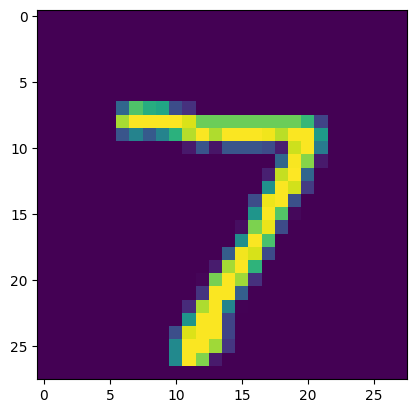

In [109]:
plt.imshow(test_images[0])
print(test_labels[0])
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

In [44]:
# inference
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[3]
